### Supisara Poopair ID: 6410422024

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn import preprocessing,metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score,mean_squared_error
from sklearn.preprocessing import StandardScaler



In [4]:
df_train_og = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
df_train_og.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [5]:
df_test = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
#df_test.head()

In [6]:
# Your work
# Must have
# 1. Cleansing data
# 2. Exploratory Data Analysis (describe insight and visualization)
# 3. Training data - Crossvalidation
# 4. Testing data

# 1. Cleansing Data

In [7]:
df_train_og.isna().sum().sort_values(ascending = False)

x19    145
x8     135
x13    130
x20    126
x17    125
x14    124
x6     118
x1     109
x15    107
x4      93
x16     93
x7      81
x10     79
x5      60
x3      56
x2      34
x18     20
x11     17
x12     12
x9       0
y        0
dtype: int64

In [8]:
df_train_og.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
count,7391.000000,7466.000000,7444.000000,7407.000000,7440.000000,7382.000000,7419.000000,7365.000000,7500.000000,7421.000000,...,7488.000000,7370.000000,7376.000000,7393.000000,7407.000000,7375.000000,7480.000000,7355.000000,7374.000000,7500.000000
mean,-14.968355,-225.221402,43.881855,5.011837,5.000313,747.260313,-301.412577,18.022226,54976.184397,30.205776,...,3.989506,4980.754126,119.932257,16.416643,39.940365,201.071874,9.989558,253.723195,-5.011305,0.252667
std,2.988404,84.285854,15.143164,0.976388,1.003350,249.253074,87.990472,5.060680,19537.797954,8.062984,...,1.783844,997.767816,33.381818,5.615822,7.974831,40.675391,1.951504,50.682702,0.983928,0.434570
min,-26.927722,-624.653252,-10.267461,0.735394,0.477509,-195.823833,-628.442832,-5.428193,-17829.881370,0.331504,...,-3.003061,1184.208527,-19.548508,-8.185806,9.690014,33.155239,2.461842,54.792614,-8.568794,0.000000
25%,-16.979950,-270.529016,33.801932,4.361544,4.314655,578.359935,-360.089533,14.661261,42118.143668,24.791255,...,2.805723,4304.897615,97.161534,12.924786,34.585579,173.529290,8.706041,219.374190,-5.671620,0.000000
50%,-14.976339,-216.805558,44.449349,5.020168,5.009823,744.383078,-299.838766,18.081437,55645.293455,30.119152,...,4.005061,4994.244504,120.236974,16.738817,40.019605,201.277755,9.991678,253.551730,-5.011579,0.000000
75%,-12.947586,-168.963819,54.265231,5.674351,5.678090,910.955847,-241.908103,21.350585,68519.592863,35.621576,...,5.161177,5644.037452,142.391308,20.312328,45.375396,228.361639,11.316860,288.184481,-4.361536,1.000000
max,-3.829402,37.543107,95.317156,8.439056,8.623321,1748.660648,84.687849,37.603060,116364.508600,59.280488,...,11.824146,8972.429051,231.576019,35.623238,68.438686,348.124801,18.477174,446.767201,-1.054174,1.000000


In [9]:
df_train = df_train_og.copy() 
#df_train = df_train.fillna(df_train.mean())
df_train = df_train.fillna(df_train.median())
#df_train = df_train.fillna(0)
#df_train = df_train.dropna()
df_train.shape

(7500, 21)

In [10]:
df_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,-14.968471,-225.183250,43.886092,5.011940,5.000389,747.215044,-301.395580,18.023292,54976.184397,30.204863,...,3.989531,4980.987959,119.937295,16.421239,39.941348,201.075305,9.989564,253.719880,-5.011310,0.252667
std,2.966606,84.096465,15.086595,0.970315,0.999329,247.284505,87.514121,5.014927,19537.797954,8.020406,...,1.782416,989.083099,33.104698,5.575744,7.925231,40.334968,1.948900,50.190317,0.975627,0.434570
min,-26.927722,-624.653252,-10.267461,0.735394,0.477509,-195.823833,-628.442832,-5.428193,-17829.881370,0.331504,...,-3.003061,1184.208527,-19.548508,-8.185806,9.690014,33.155239,2.461842,54.792614,-8.568794,0.000000
25%,-16.946875,-270.376488,33.870690,4.368899,4.321786,581.650314,-359.040620,14.716035,42118.143668,24.865334,...,2.807211,4312.682195,97.653228,12.987055,34.663956,174.242736,8.708315,220.098241,-5.659095,0.000000
50%,-14.976339,-216.805558,44.449349,5.020168,5.009823,744.383078,-299.838766,18.081437,55645.293455,30.119152,...,4.005061,4994.244504,120.236974,16.738817,40.019605,201.277755,9.991678,253.551730,-5.011579,0.000000
75%,-12.981909,-169.082614,54.154654,5.664521,5.674039,907.860296,-242.495011,21.291684,68519.592863,35.556479,...,5.158987,5633.053472,141.823945,20.245645,45.297458,227.817983,11.313516,287.382628,-4.375275,1.000000
max,-3.829402,37.543107,95.317156,8.439056,8.623321,1748.660648,84.687849,37.603060,116364.508600,59.280488,...,11.824146,8972.429051,231.576019,35.623238,68.438686,348.124801,18.477174,446.767201,-1.054174,1.000000


# 2. Exploring Data

There are 1895 1-class in the original dataset, even though there are 5605 of 0-class in the dataset.


<AxesSubplot:xlabel='y', ylabel='count'>

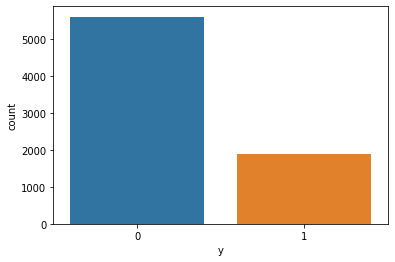

In [11]:
C1 = len(df_train[df_train.y == 1])
C0 = len(df_train[df_train.y == 0])
print('There are '+ str(C1) + ' 1-class in the original dataset, even though there are ' + str(C0) +' of 0-class in the dataset.')

sns.countplot(data =df_train , x ='y')

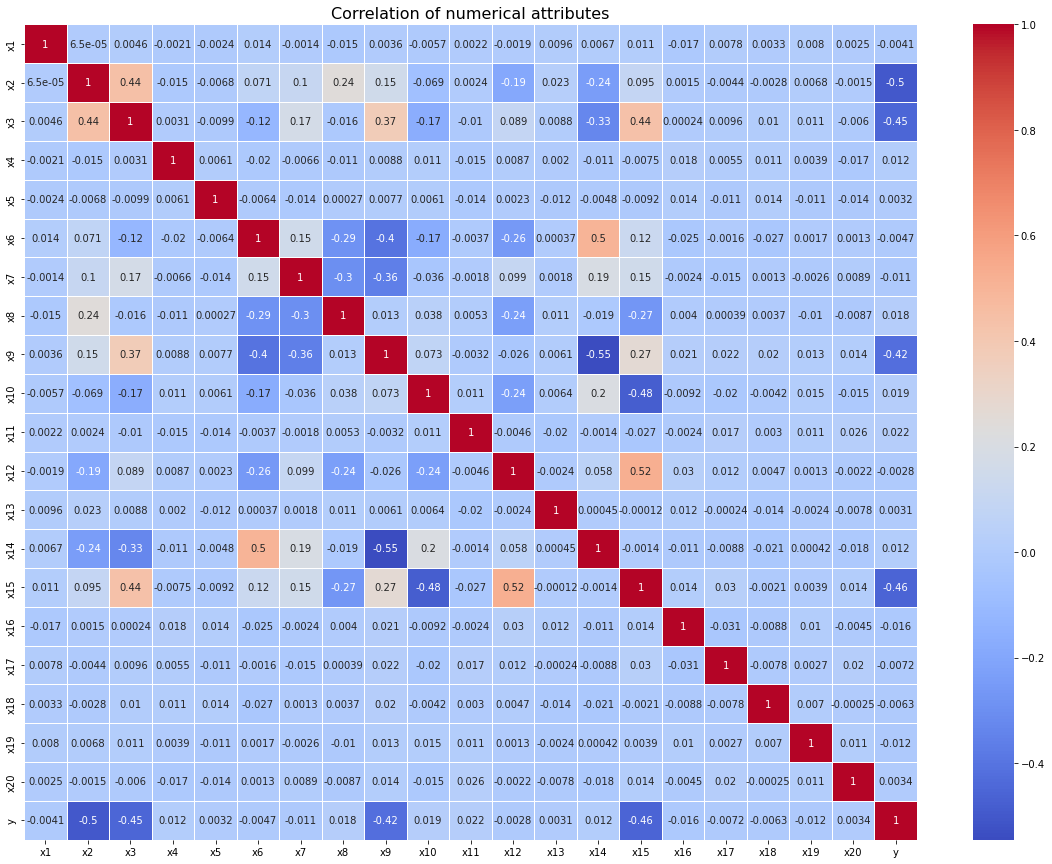

In [12]:
correlation = df_train.corr()

f, ax = plt.subplots(figsize=(20,15))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, lw=0.5, cmap='coolwarm', annot=True)
plt.show()


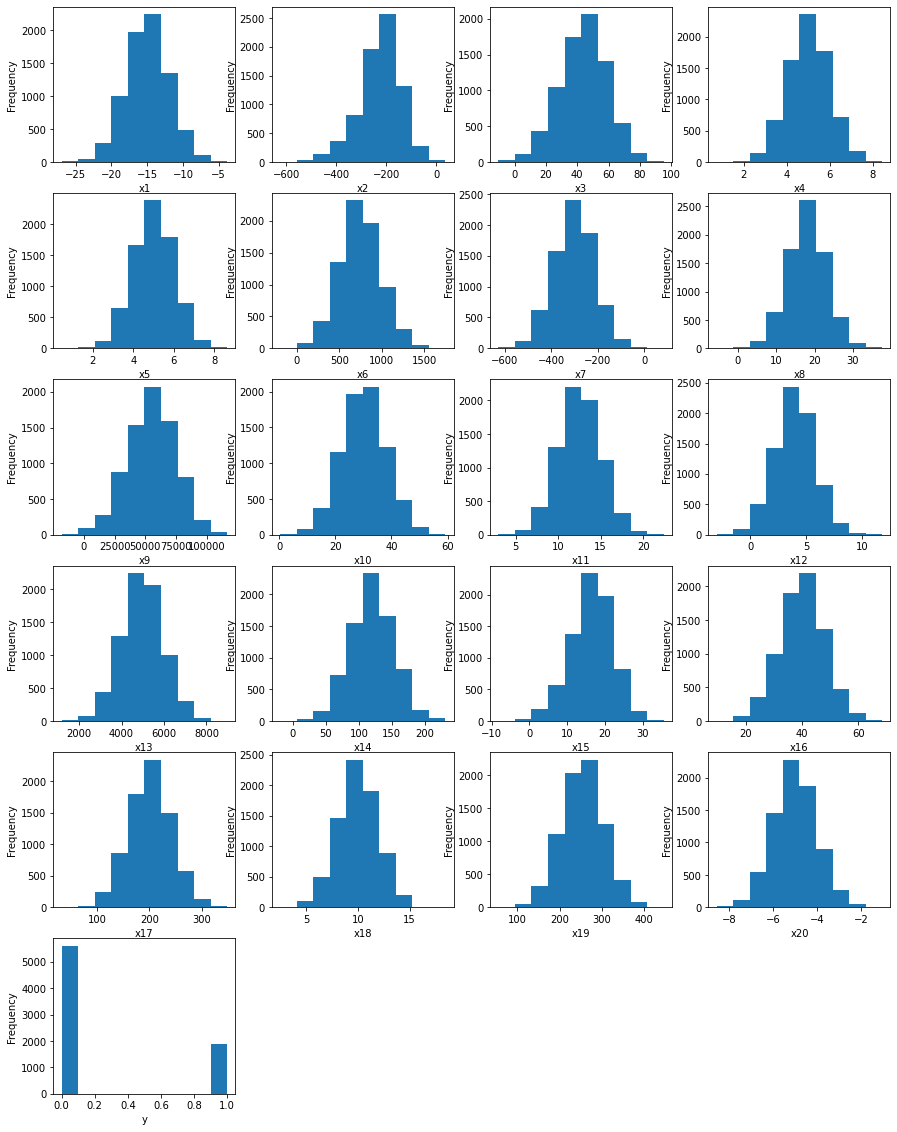

In [13]:
fig = plt.figure(figsize=(15,20))
i = 0
for column in df_train:
    sub = fig.add_subplot(6,4,i+1)
    sub.set_xlabel(column)
    df_train[column].plot(kind = 'hist')
    i = i+1

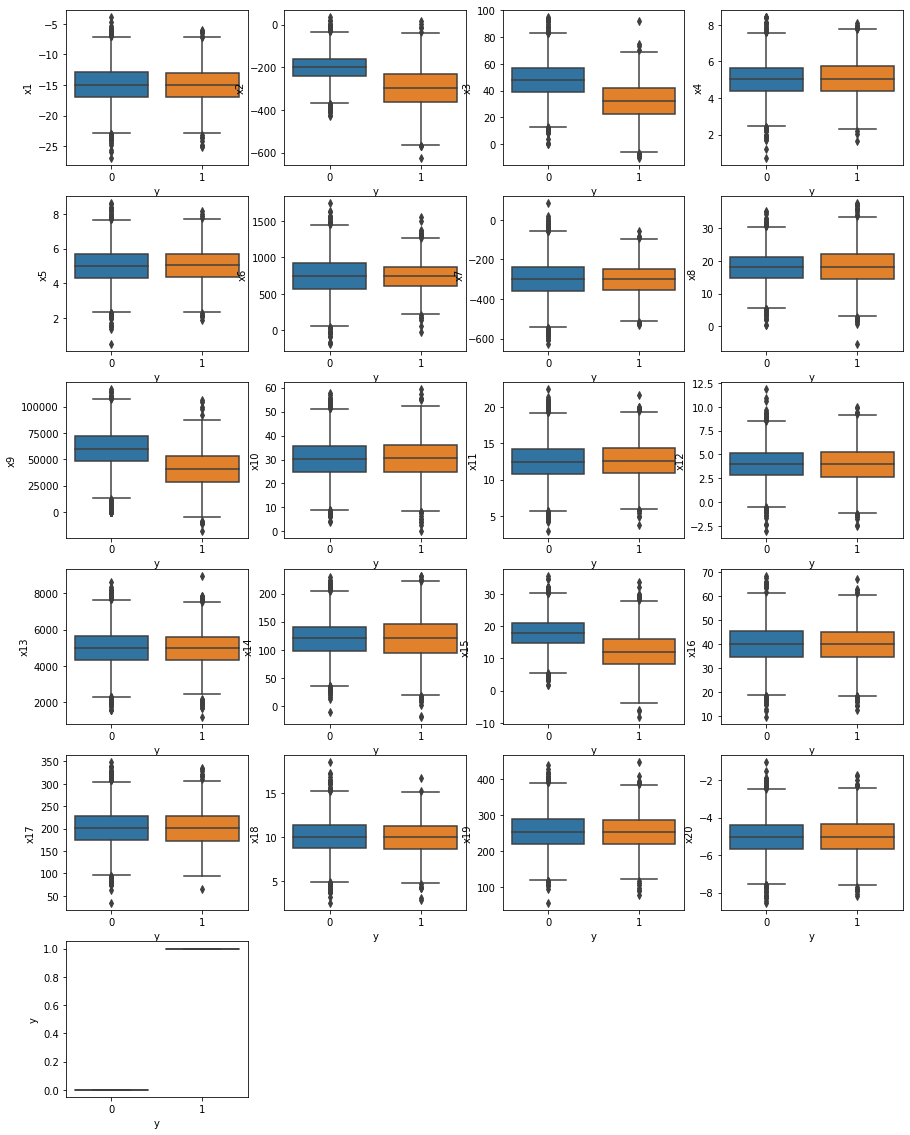

In [14]:
fig = plt.figure(figsize=(15,20))
i = 0
for column in df_train:
    sub = fig.add_subplot(6,4,i+1)
    sns.boxplot(x = 'y', y = column, data = df_train)
    i = i+1

# 3. Training data - Crossvalidation

In [15]:
X = df_train.drop(['y'], axis=1)
y = df_train['y']

In [16]:
#Scaling

sc = StandardScaler()
X_sc = sc.fit_transform(X)

#X_sc

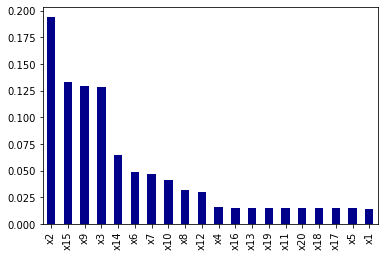

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_sc,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar',color='darkblue')
plt.show()

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=15)

X_selected = fs.fit_transform(X_sc, y)


print(X_selected.shape)

(7500, 15)


In [19]:
print('Selected Features are')

print(fs.get_feature_names_out())

Selected Features are
['x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x14' 'x15' 'x16'
 'x17' 'x18']


Selected Features are
['x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13' 'x14' 'x15' 'x16'
 'x17' 'x18']

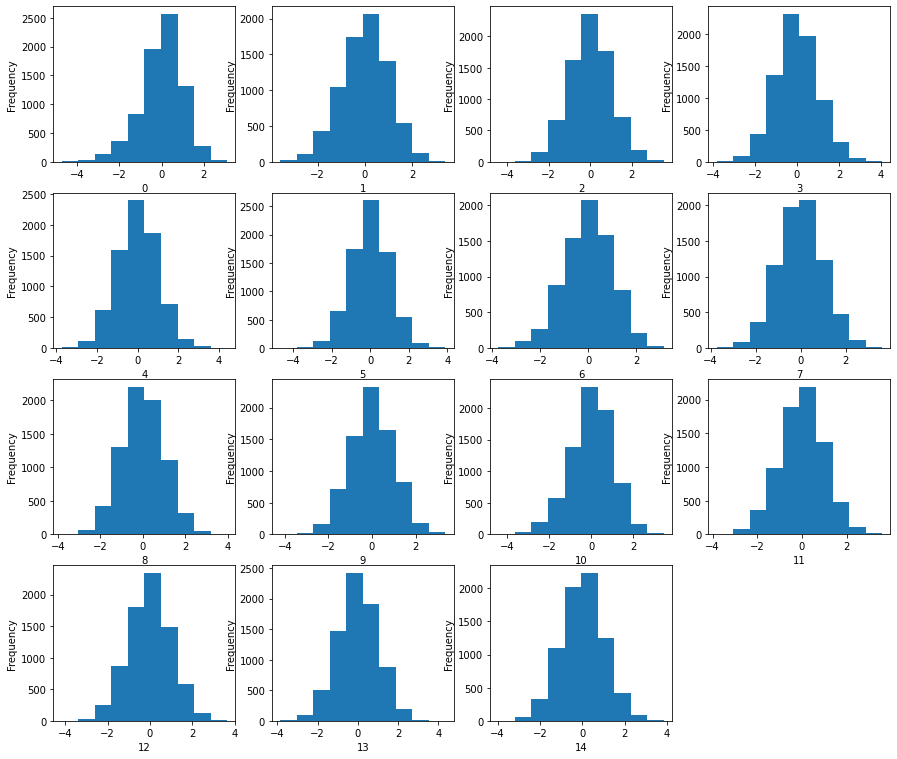

In [20]:
df_sel = pd.DataFrame(X_selected)
fig = plt.figure(figsize=(15,20))
i = 0
for column in df_sel:
    sub = fig.add_subplot(6,4,i+1)
    sub.set_xlabel(column)
    df_sel[column].plot(kind = 'hist')
    i = i+1

In [21]:
per_test = 0.25

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=per_test, random_state=101)

---

**Train**

In [22]:
model_pipeline = []

model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(MLPClassifier())
model_pipeline.append(GaussianNB())

In [23]:
model_list = ['Log Reg','KNN','Desision Tree','Random Forrest','SVC','NN','GNB']
acc_list = []
auc_list = []
cm_list = []
f1_list = []

for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_tresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))

In [24]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list,'F1':f1_list})
result_df

,Model,Accuracy,AUC,F1
0,Log Reg,0.932800,0.91,0.932521
1,KNN,0.954667,0.92,0.953845
2,Desision Tree,0.938133,0.91,0.937562
3,Random Forrest,0.964267,0.95,0.963976
4,SVC,0.973333,0.96,0.973222
5,NN,0.979733,0.97,0.979678
6,GNB,0.892267,0.87,0.893628


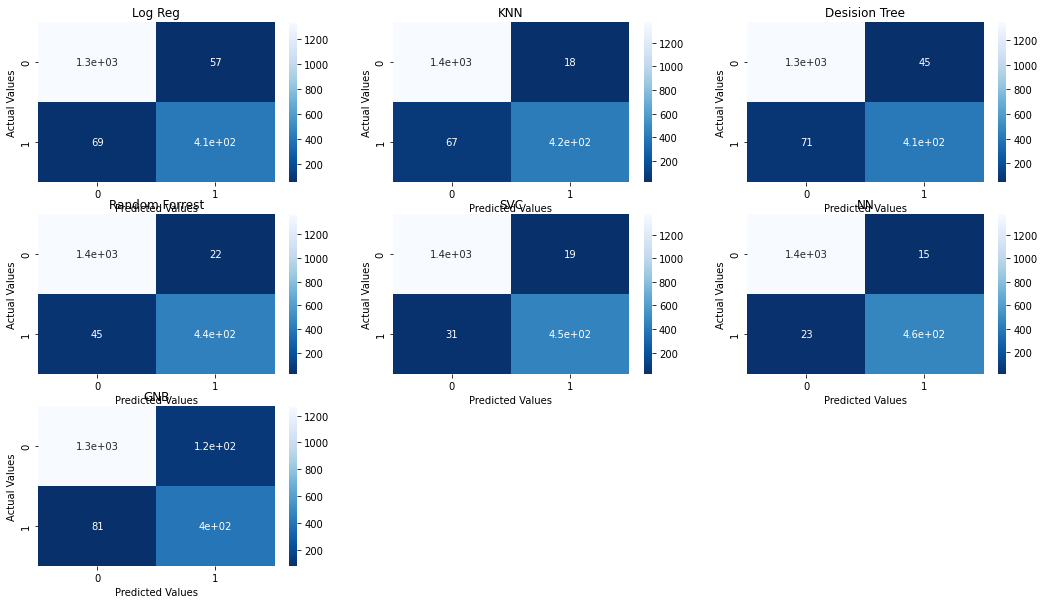

In [25]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot = True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

---

Best model with highest F1-Score is Neural Network

<break>**Tuning Model using Randomized**

In [26]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30),(50,25,10)],
    'max_iter': [50, 100, 150,300,500,1500],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001,0.01,0.1, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = RandomizedSearchCV(MLPClassifier(), param_grid,cv=5)

In [27]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1,
                                                  0.05],
                                        'hidden_layer_sizes': [(150, 100, 50),
                                                               (120, 80, 40),
                                                               (100, 50, 30),
                                                               (50, 25, 10)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': [50, 100, 150, 300, 500,
                                                     1500],
                                        'solver': ['sgd', 'adam']})

In [28]:
best_grid = grid.best_estimator_

In [29]:
print(grid.best_params_)

print(grid.best_estimator_)

{'solver': 'adam', 'max_iter': 50, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (120, 80, 40), 'alpha': 0.01, 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(120, 80, 40),
              learning_rate='adaptive', max_iter=50)


In [30]:
best_grid = MLPClassifier(activation='tanh', max_iter=150, hidden_layer_sizes=(100, 50, 30)).fit(X_train,y_train)

In [31]:
y_pred_2 = None
y_pred_2 = best_grid.predict(X_test)


print('F1 - Accuracy: {:.5f}'.format(f1_score(y_test, y_pred_2, average='weighted')))

F1 - Accuracy: 0.98075


In [32]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1393
           1       0.97      0.95      0.96       482

    accuracy                           0.98      1875
   macro avg       0.98      0.97      0.97      1875
weighted avg       0.98      0.98      0.98      1875



MLPClassifier(activation='tanh', max_iter=150, hidden_layer_sizes=(100, 50, 30))

In [33]:
pca = PCA(0.95)
pca.fit(X_train)
print(pca.n_components_) 

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

13


In [34]:
y_pred_NN = MLPClassifier().fit(X_train,y_train).predict(X_test)
print('F1 - Accuracy NN: {:.5f}'.format(f1_score(y_test, y_pred_NN, average='weighted')))


y_pred_SVM = SVC().fit(X_train,y_train).predict(X_test)
print('F1 - Accuracy SVM: {:.5f}'.format(f1_score(y_test, y_pred_SVM, average='weighted')))

F1 - Accuracy NN: 0.96199
F1 - Accuracy SVM: 0.95967


@12 F1 - Accuracy NN: 0.97588
F1 - Accuracy SVM: 0.97454

<break>@15 F1 - Accuracy NN: 0.98192
F1 - Accuracy SVM: 0.97725
    
<break>@15 dropna F1 - Accuracy NN: 0.98530
F1 - Accuracy SVM: 0.98196


{'solver': 'adam',
 'max_iter': 50,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (150, 100, 50),
 'alpha': 0.0001,
 'activation': 'tanh'}

{'solver': 'adam',
 'max_iter': 50,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (150, 100, 50),
 'alpha': 0.01,
 'activation': 'tanh'} 0.98594 -g23

{'solver': 'adam',
 'max_iter': 500,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (150, 100, 50),
 'alpha': 0.001,
 'activation': 'tanh'}0.98528 - gg24

{'solver': 'adam', 'max_iter': 150, 'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'tanh'}
MLPClassifier(activation='tanh', max_iter=150) 0.98730 grid12

{'solver': 'adam', 'max_iter': 300, 'learning_rate': 'constant', 'alpha': 0.1, 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.1, max_iter=300) grid13 0.98215

{'solver': 'adam', 'max_iter': 150, 'learning_rate': 'adaptive', 'alpha': 0.01, 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.01, learning_rate='adaptive',
              max_iter=150) 0.94781

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(120, 80, 40),
              learning_rate='adaptive', max_iter=500, solver='sgd') 0.94944

{'solver': 'adam', 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 30), 'alpha': 0.0001, 'activation': 'tanh'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50, 30), max_iter=500)   0.98602

# 4. Testing

In [35]:
df_test_sc = sc.transform(df_test)
df_test_kb = fs.transform(df_test_sc)

predict = best_grid.predict(df_test_kb)

fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('submit_final.csv', index=False)
print('done')

done
